# Data_Storytelling_Case_Study: Fast Food Marketing<a id='2_Data_wrangling'></a>

## 0. Table of Contents<a id='2.1_Contents'></a>
* Fast Food Marketing Notebook
  * 0. Table of Contents
  * 1. Introduction
  * 2. Imports
  * 3. Load Fast Food Marketing Data
  * 4. Explore The Data
    * 4.1 Assess Missing Values By Column
    * 4.2 Assessing Marketing Data Based on Features
    * 4.3 Correlation Based on Target (SalesInThousands)
      * 4.3.1 Scatterplots and Assessing Max Values
      *  4.3.2 Heatmap & Correlations (SalesInThousands)
  * 5. Save data
  * 6. Summary

## 1. Introduction

Fast Food Company dataset retreived from: https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test/
details different columns as mentioned in the summary within the link of MarketID, MarketSize (size of the market given sales), LocationID, AgeofStore in years, Promotion (details which promotion was lauched for the store), week (which week of the 4 weeks of a month the promotion was tested on), and SalesinThousands (amount of sales given LocationID, Promotion, and week). 

The goal of this notebook is to glean any important insights or trends given the dataset to understand the marketing data and potential future work would be to given the features predict with different Regression Analysis models the SalesinThounsands for promotion number and week being distributed to assist with future company decision making. The audience for the notebook will be employees within the Fast Food Company and those invovled with overall decision making.

## 2. Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to verify/clean the databset provided.

In [2]:
#Import pandas, matplotlib.pyplot, seaborn, and ydata Profile report
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import os
from ydata_profiling import ProfileReport

## 3. Load Fast Food Marketing Data

In [3]:
# Load the CSV Fast Food Marketing Data
food_df = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Springboard/Data_Storytelling_Case_Study/WA_Marketing_Campaign.csv')

Auditing the dataset with .info() and .head() displaying the first few records.

In [4]:
#info method on bank_df to see a summary of the data
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
#head method on bank_df to print the first several rows of the data
food_df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


## 4. Explore The Data

### 4.1 Assess Missing Values By Column

Count the number of missing values in each column.

In [6]:
food_df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

The dataset intially seems 'tidy' where every feature has filled in observations, however a further analysis is needed to see if any values have been imputed with 0 or 'missing', etc.

In [7]:
#Assessing columns as well based on .describe() method
food_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MarketID,548.0,5.715328,2.877001,1.00,3.000,6.0,8.0000,10.00
LocationID,548.0,479.656934,287.973679,1.00,216.000,504.0,708.0000,920.00
AgeOfStore,548.0,8.503650,6.638345,1.00,4.000,7.0,12.0000,28.00
Promotion,548.0,2.029197,0.810729,1.00,1.000,2.0,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.750,2.5,3.2500,4.00
SalesInThousands,548.0,53.466204,16.755216,17.34,42.545,50.2,60.4775,99.65


In [8]:
#Assessing number of categorical columns in the dataset.
food_df['MarketSize'].value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

In [55]:
#Determing all the unique values found in the categorical column.
food_df['MarketSize'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

The categories of MarketID, LocationID, Promotion, and week seem to all have indepedent single value distribution for each observation or namely that each of these categories seem to just be labels for each observation. Therefore, in order to prevent skew of results, these columns will be converted into unique categorical columns instead of its current 'numeric' distribution. The columns 'Promotion' and 'week' will also be assessed for unique to assess any 0 or 'missing' values.

In [20]:
#Method to convert int64 to object or str found on https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
food_df['MarketID'] = food_df['MarketID'].apply(str)
food_df['LocationID'] = food_df['LocationID'].apply(str)
food_df['Promotion'] = food_df['Promotion'].apply(str)
food_df['week'] = food_df['week'].apply(str)
food_df.dtypes

MarketID             object
MarketSize           object
LocationID           object
AgeOfStore            int64
Promotion            object
week                 object
SalesInThousands    float64
dtype: object

In [21]:
food_df['Promotion'].value_counts()

3    188
2    188
1    172
Name: Promotion, dtype: int64

In [22]:
food_df['week'].value_counts()

1    137
2    137
3    137
4    137
Name: week, dtype: int64

It seems looking at the describe for the numerical feature and slicing to retrieve the categorical feature, that for the numerical values the minumum value is 1 for most of the columns, meaning there is no imputed 0 column and for the categorical column, it seems there is no 'missing' or other form of imputation for any missing data. Therefore, the dataset seems tidy.

In [23]:
#Created a ydata profile report to provide further analysis breakdown of dataset.
profile = ProfileReport(food_df, title="Profiling Report")
profile.to_file('Fast_Food_Dataset_Profile_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Based on the ydata profile report, it seems the dataset however has some highly correlated features most notably being that SalesInThousands and MarketSize. This might pose an issue in future work as per developing predicability model for SalesInThousands and therefore potential to be dropped as a column for training the predictive model. 

### 4.2 Assessing Marketing Data Based on Features

The following steps will allow us to retreive information regarding the dataset for the current Marketing Data.

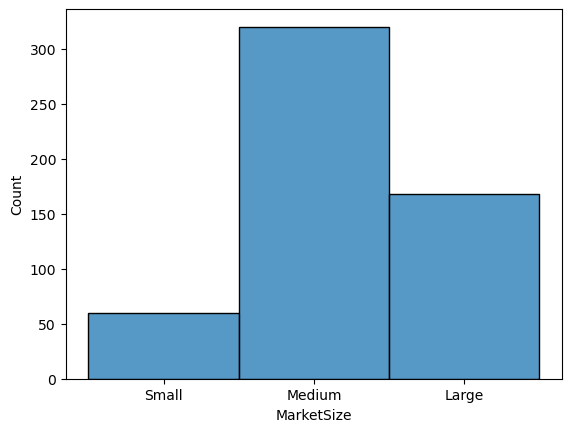

In [24]:
#Plot distribution of MarketSize
#Code to reorient order of categorical column found on https://stackoverflow.com/questions/44067951/sorting-categorical-labels-in-seaborn-chart
sns.histplot(data=food_df.sort_values(by='MarketSize', ascending=False), x='MarketSize')
plt.show()

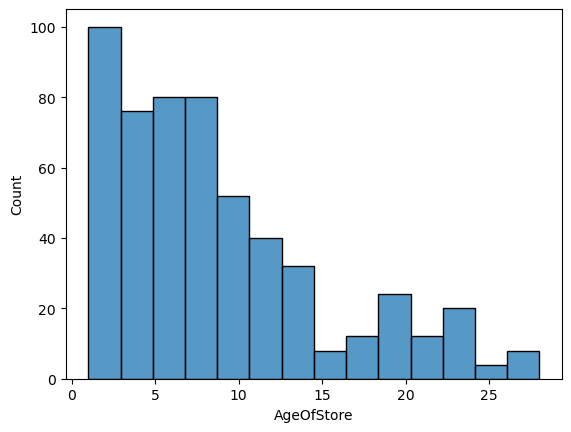

In [25]:
sns.histplot(data=food_df , x='AgeOfStore')
plt.show()

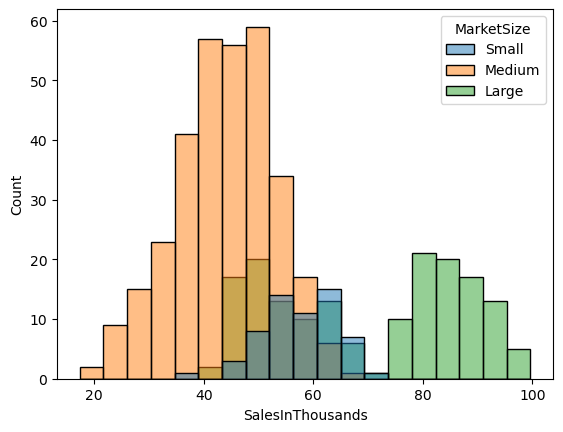

In [26]:
sns.histplot(data=food_df , x='SalesInThousands', hue='MarketSize', hue_order=['Small', 'Medium', 'Large'])
plt.show()

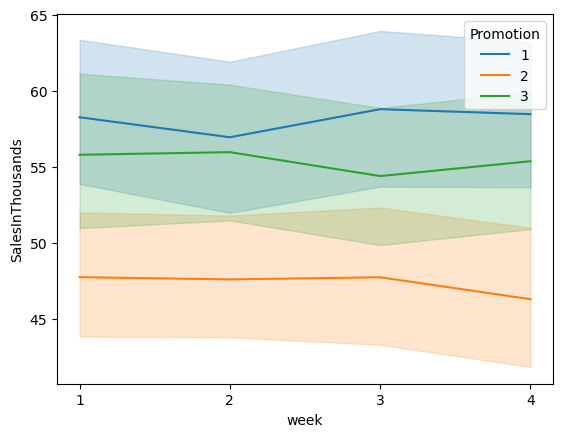

In [65]:
sns.lineplot(data=food_df , x='week', y='SalesInThousands', hue ='Promotion', hue_order = ['1','2','3'])
plt.show()

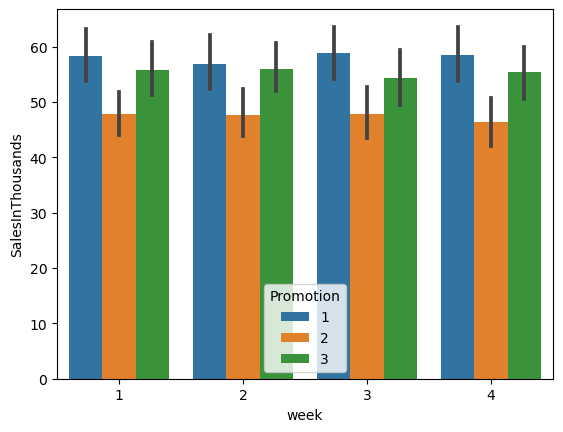

In [68]:
sns.barplot(data=food_df , x='week', y='SalesInThousands', hue ='Promotion', order=['1','2','3','4'], hue_order=['1','2','3'])
plt.show()

Looking at the above resulting plots, some trends for the dataset seem to be that most of the data is coming from a Medium sized market thereby meaning the dataset is imbalanced as per number of observations from each market size. It also seems that the company seems to have a wide range in terms of different store age, however age of the store seems to average at around 8.5 years. This means the company as a whole has a larger amount of stores on the newer side in terms of their respective market than being more established. 

Looking at the SalesinThounsands versus different featuers within the dataset, some other mentions are that the large market size has the highest number as per sales for the fast food product and on average the small market size seems to be second larger to the medium. This means that though the medium size is the largest as per volume, not often does this market size seem to be the highest gross fast food income for the company. 

In terms of SalesinThousands compared to weeks of when each promotion item was offered, it seems when the promotion item was offered in week 1 it had the largest number of people purchasing, and it seems there are values for week 1 where the sale was also the highest dollar amount as per the graph.

### 4.3 Correlation Based on Target (SalesInThousands)

#### 4.3.1 Scatterplots and Assessing Max Values

Displaying scatter plots of certain feature values as compared to target SalesInThousands and displaying correlation values and heatmap.

In [36]:
#Converting current dataframe to add numeric values for categorical column of MarketSize
food_df_dummy = pd.get_dummies(food_df)

Applying scatter plots to further analyze correlations of the different feature variables with Target (SalesInThousands).

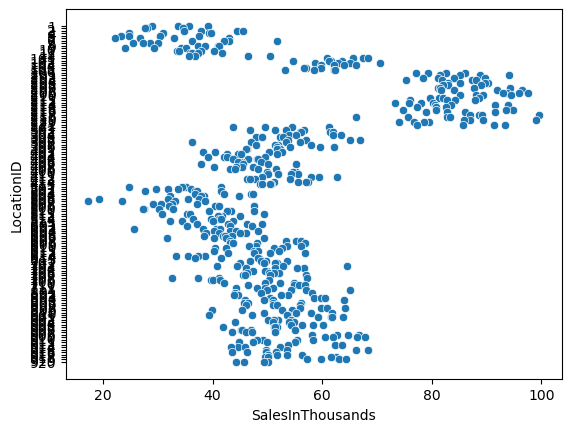

In [37]:
sns.scatterplot(data=food_df, x='SalesInThousands', y='LocationID')
plt.show()

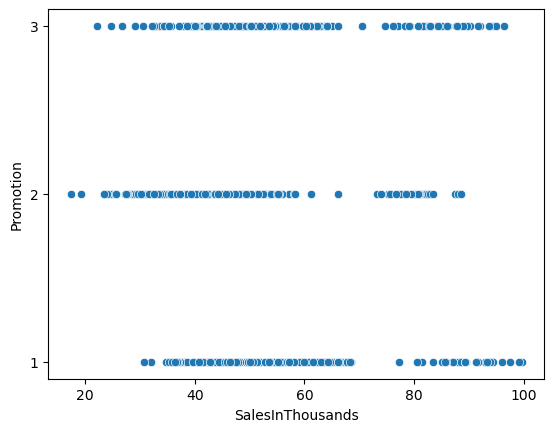

In [38]:
sns.scatterplot(data=food_df, x='SalesInThousands', y='Promotion')
plt.show()

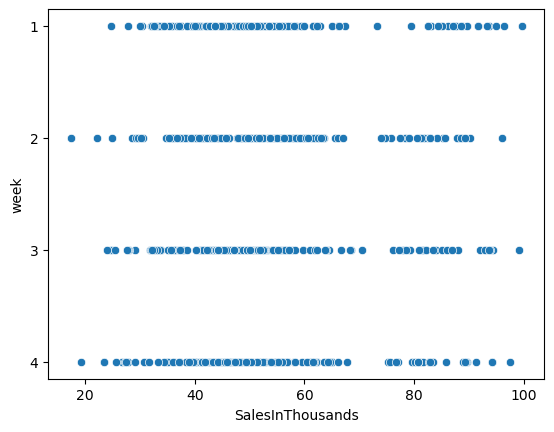

In [39]:
sns.scatterplot(data=food_df, x='SalesInThousands', y='week')
plt.show()

In [40]:
#Retreiving max value for dataframe based on SalesInThousands and assessing top 5 rows as well.
food_df_dummy[food_df_dummy['SalesInThousands'] == max(food_df_dummy['SalesInThousands'])]

,AgeOfStore,SalesInThousands,MarketID_1,MarketID_10,MarketID_2,MarketID_3,MarketID_4,MarketID_5,MarketID_6,MarketID_7,...,LocationID_918,LocationID_919,LocationID_920,Promotion_1,Promotion_2,Promotion_3,week_1,week_2,week_3,week_4
144,2,99.65,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [41]:
food_df_dummy.sort_values(by='SalesInThousands', ascending=False).head()

,AgeOfStore,SalesInThousands,MarketID_1,MarketID_10,MarketID_2,MarketID_3,MarketID_4,MarketID_5,MarketID_6,MarketID_7,...,LocationID_918,LocationID_919,LocationID_920,Promotion_1,Promotion_2,Promotion_3,week_1,week_2,week_3,week_4
144,2,99.65,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
154,3,99.12,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
111,1,97.61,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
104,1,96.48,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
109,1,96.01,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Looking at the above scatterplots and the quick assessement of retreival of max SalesInThousands, it seems that actually the max value for Sales comes from when the company sent its promotion week 1 with the highest sales comes from Locations 218, 220, 209, and 208. 

#### 4.3.2 Heatmap & Correlations (SalesInThousands)

Creating a correlation object and heatmap to display correlation of features with target SalesInThousands.

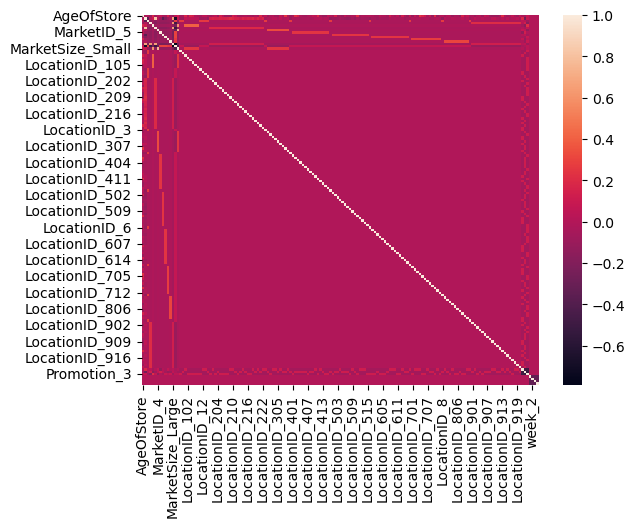

In [43]:
sns.heatmap(food_df_dummy.corr())
plt.show()

In [92]:
#Retrieved just the SalesInThousands column from the correlation dataframe created and sorted based on correlation values
corr_df = food_df_dummy.corr()
corr_df['SalesInThousands'].sort_values(ascending=False)

SalesInThousands     1.000000
MarketSize_Large     0.661359
MarketSize_Small     0.082595
week                -0.010984
AgeOfStore          -0.028533
Promotion           -0.059212
LocationID          -0.187852
MarketID            -0.192389
MarketSize_Medium   -0.670968
Name: SalesInThousands, dtype: float64

From the correlation values listed above, it seems that MarketSize_Large is as seen with the Alert from ydata profiling, is highly correlated with the SalesInThousands which is something to keep in mind when in future training for a predictive model. And it seems when the market size is medium there is a large negative correlation with the SalesInThousands column. These columns will be left in as per model development but will be kept in mind when in training a model.

However it seems that 'Promotion' out of the variables that are not as correlated with one another, had more negative correlation with SalesInThousands. It seems then that the promotion being distributed for each store does have a slight impact on the overall sale for the product, however further testing potentially a hypothesis test will need to be implemented to determine how siginificant is the overall promotion correlation to the total overall Sales value, meaning is it just by random chance that the promotion has its slight impact on the Sales or is there some statistical significance where the null being that the promotion has no impact on the total sales for the product. 

## 5. Save data

In order to avoid the dummy variable trap, the MarketSize_Medium variable since it is the most common, will be dropped in terms of potential future model development.

In [89]:
food_df_dummy_dropped = food_df_dummy.drop(['MarketSize_Medium'], axis=1)

In [90]:
food_df_dummy_dropped.shape

(548, 8)

In [91]:
# save the data to a new csv file
datapath = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Springboard/Data_Storytelling_Case_Study/Dataset/food_df_dummy.csv'
food_df_dummy_dropped.to_csv(datapath)  

## 6. Summary

Few different insights were gleaned in terms of the dataset for the marketing data for the Fast Food company. It seems that according to the max vales as per SalesInThousands was found when the company intiated promotion 1 on week 1 of the large market size group. And regardless it seemed that promotion 1 had the highest value in terms of SalesInThousands. It also seems that correlation has a somewhat negative correlation though to the SalesInThousands column which will need to be further investigated. The company also seems to on a whole have stores that are relatively younger in terms of establishment and it seems the max sales values were being retrieved from this relatively newer lines of stores. A potential factor could be the 'newness' of these stores given the area so this could be a potential factor affecting the skew. This dataset will need to be further assessed and retreieved again potentially in another five years to see if the younger stores are still able to meet sales goals.

Overall the dataset is tidy, and future work will need to be implemented in order to see if a potentially a Regression predictive model can be created to determine the Target SalesInThousands column given the company promotion and week being distributed.